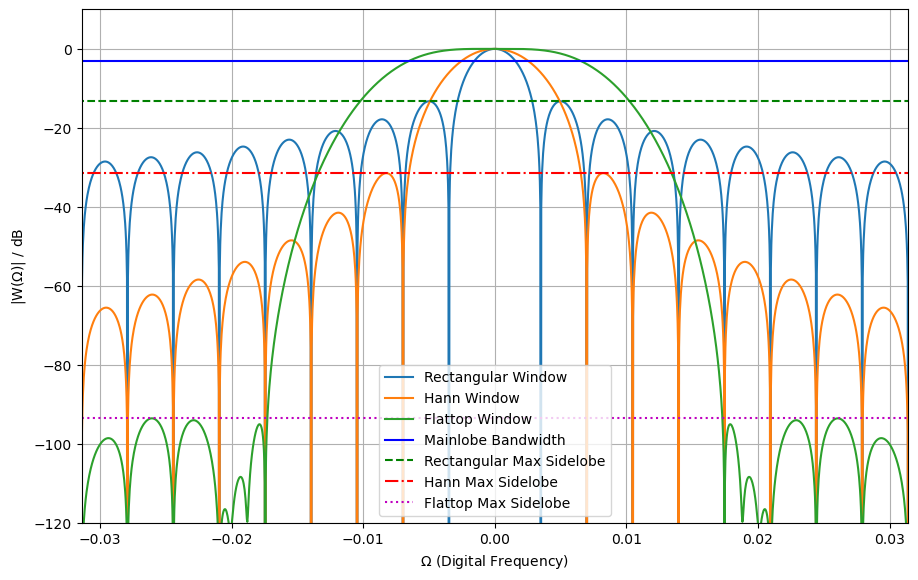

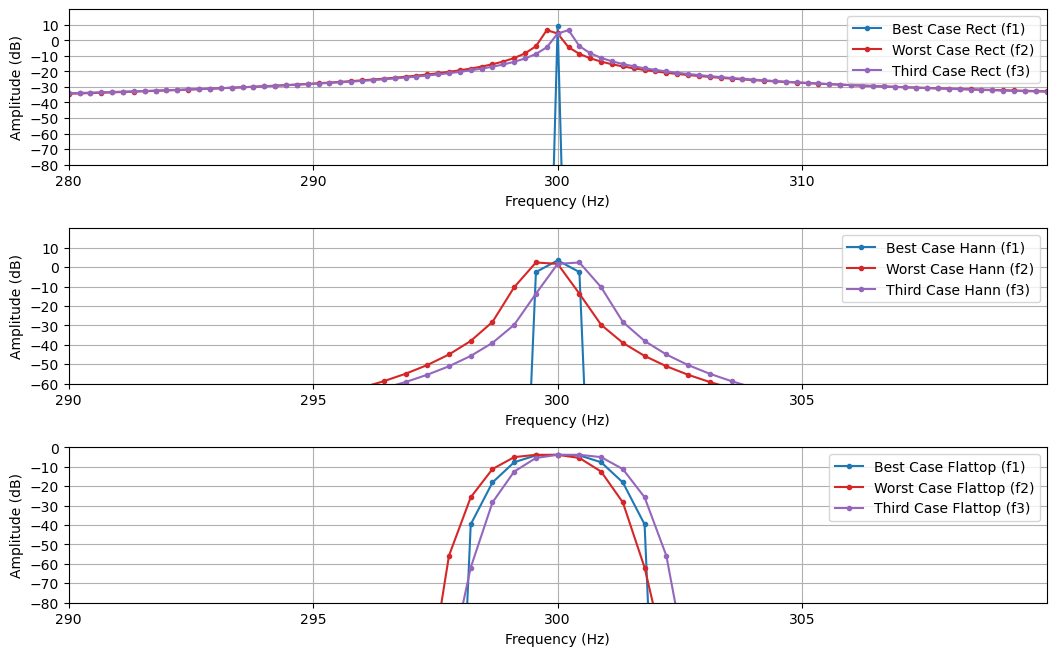

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

# Parameters for the sine signals and sampling
f1 = 500  # Frequency of the signal (Hz)
f2 = 500.25  
f3 = 499.75  
fs = 800  # Sampling frequency (Hz)
N = 1800  # Number of samples
k = np.arange(N)  # Sample index

# Generate three sine signals
x1 = 3 * np.sin(2 * np.pi * f1 / fs * k)  
x2 = 3 * np.sin(2 * np.pi * f2 / fs * k)  
x3 = 3 * np.sin(2 * np.pi * f3 / fs * k) 

# Generate window functions
wrect = np.ones(N)  
whann = hann(N, sym=False)  
wflattop = flattop(N, sym=False)  

# Function to compute the DTFT-like spectrum in dB
def winDTFTdB(w):
    N = w.size  
    Nz = 100 * N  
    W = np.zeros(Nz)  
    W[0:N] = w 
    W = np.abs(fftshift(fft(W)))  # FFT and shift to center frequencies
    W /= np.max(W)  # Normalize to the mainlobe maximum
    W = np.where(W == 0, 1e-10, W)  # Avoid log(0) errors
    W = 20 * np.log10(W)  # Convert to dB
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # Digital frequency range
    return Omega, W

# Plot DTFT of the windows
plt.figure(figsize=(16 / 1.5, 10 / 1.5))

Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='Rectangular Window', color='C0')
Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='Hann Window', color='C1')
Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='Flattop Window', color='C2')

# Add mainlobe and sidelobe levels for comparison
plt.plot([-np.pi, np.pi], [-3.01, -3.01], 'b-', label='Mainlobe Bandwidth')  
plt.plot([-np.pi, np.pi], [-13.3, -13.3], 'g--', label='Rectangular Max Sidelobe')  
plt.plot([-np.pi, np.pi], [-31.5, -31.5], 'r-.', label='Hann Max Sidelobe')  
plt.plot([-np.pi, np.pi], [-93.6, -93.6], 'm:', label='Flattop Max Sidelobe')  

# Configure plot limits and labels
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.xlabel(r'$\Omega$ (Digital Frequency)')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)

# Zoom into the mainlobe
plt.xlim(-np.pi / 100, np.pi / 100)
plt.show()

# Compute FFT for each signal with different windows
X1wrect = fft(x1)  
X2wrect = fft(x2)  
X3wrect = fft(x3)  

X1whann = fft(x1 * whann) 
X2whann = fft(x2 * whann)  
X3whann = fft(x3 * whann)  

X1wflattop = fft(x1 * wflattop)  
X2wflattop = fft(x2 * wflattop)  
X3wflattop = fft(x3 * wflattop)  

# Function to normalize FFT to dB
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X  # Normalize FFT amplitude
    Xtmp[0] *= 1 / 2  # Correct DC component
    if N % 2 == 0:  # Correct Nyquist frequency for even N
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # Convert to dB

# Frequency vector for FFT
df = fs / N
f = np.arange(N) * df

# Plot the FFT spectra for all cases
plt.figure(figsize=(16 / 1.5, 10 / 1.5))

# Rectangular window spectra
plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), 'C0o-', ms=3, label='Best Case Rect (f1)')
plt.plot(f, fft2db(X2wrect), 'C3o-', ms=3, label='Worst Case Rect (f2)')
plt.plot(f, fft2db(X3wrect), 'C4o-', ms=3, label='Third Case Rect (f3)')
plt.xlim(280, 320)
plt.ylim(-80, 20)
plt.xticks(np.arange(280, 320, 10))
plt.yticks(np.arange(-80, 20, 10))
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)

# Hann window spectra
plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), 'C0o-', ms=3, label='Best Case Hann (f1)')
plt.plot(f, fft2db(X2whann), 'C3o-', ms=3, label='Worst Case Hann (f2)')
plt.plot(f, fft2db(X3whann), 'C4o-', ms=3, label='Third Case Hann (f3)')
plt.xlim(290, 310)
plt.ylim(-60, 20)
plt.xticks(np.arange(290, 310, 5))
plt.yticks(np.arange(-60, 20, 10))
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)

# Flattop window spectra
plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), 'C0o-', ms=3, label='Best Case Flattop (f1)')
plt.plot(f, fft2db(X2wflattop), 'C3o-', ms=3, label='Worst Case Flattop (f2)')
plt.plot(f, fft2db(X3wflattop), 'C4o-', ms=3, label='Third Case Flattop (f3)')
plt.xlim(290, 310)
plt.ylim(-80, 0)
plt.xticks(np.arange(290, 310, 5))
plt.yticks(np.arange(-80, 10, 10))
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.grid(True)

plt.tight_layout()
plt.show()
